<p><font size="6"><b>01 - Pandas: Data Structures </b></font></p>

> *© 2025, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction

Let's directly start with importing some data: the `titanic` dataset about the passengers of the Titanic and their survival:

In [2]:
df = pd.read_csv("data/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Starting from reading such a tabular dataset, Pandas provides the functionalities to answer questions about this data in a few lines of code. Let's start with a few examples as illustration:

<div class="alert alert-warning">
    
What is the age distribution of the passengers?

</div>

<Axes: >

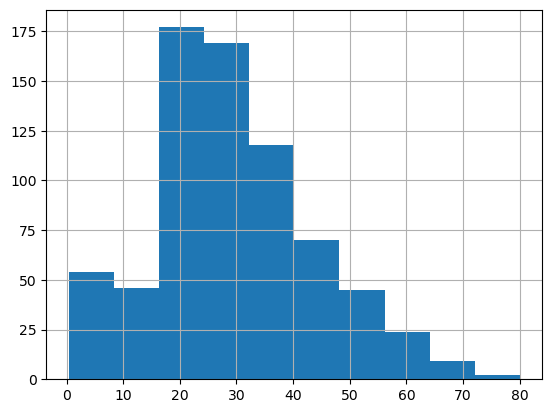

In [4]:
df['Age'].hist()

<div class="alert alert-warning">

How does the survival rate of the passengers differ between sexes?

</div>

In [5]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


<div class="alert alert-warning">

Or how does the survival rate differ between the different classes of the Titanic? 

</div>

<Axes: xlabel='Pclass'>

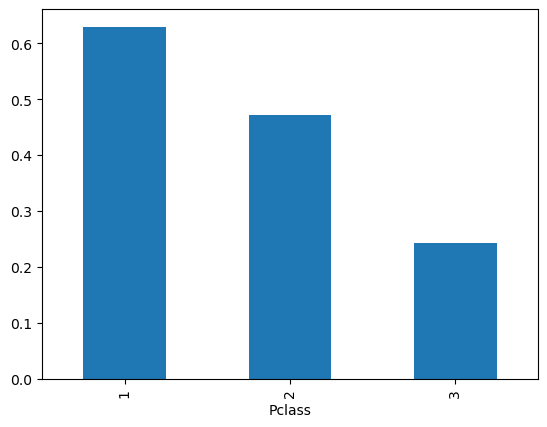

In [6]:
df.groupby('Pclass')['Survived'].mean().plot.bar()

<div class="alert alert-warning">

Are young people (e.g. < 25 years) likely to survive?

</div>

In [7]:
df['Survived'].mean()

np.float64(0.3838383838383838)

In [8]:
df25 = df[df['Age'] <= 25]
df25['Survived'].mean()

np.float64(0.4119601328903654)

All the needed functionality for the above examples will be explained throughout the course, but as a start: the data types to work with.

# The pandas data structures: `DataFrame` and `Series`

To load the pandas package and start working with it, we first import the package. The community agreed alias for pandas is `pd`,  which we will also use here:

In [9]:
import pandas as pd

Let's start with getting some data. 

In practice, most of the time you will import the data from some data source (text file, excel, database, ..), and Pandas provides functions for many different formats. 

But to start here, let's create a small dataset about a few countries manually from a dictionar of lists:

In [10]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


The object created here is a **DataFrame**:

In [11]:
type(countries)

pandas.core.frame.DataFrame

A `DataFrame` is a 2-dimensional, **tablular data structure** comprised of rows and columns. It is similar to a spreadsheet, a database (SQL) table or the data.frame in R.

<img align="center" width=50% src="../img/pandas/01_table_dataframe1.svg">

A DataFrame can store data of different types (including characters, integers, floating point values, categorical data and more) in columns. In pandas, we can check the data types of the columns with the `dtypes` attribute:

In [12]:
countries.dtypes

country        object
population    float64
area            int64
capital        object
dtype: object

## Each column in a `DataFrame` is a `Series`

When selecting a single column of a pandas `DataFrame`, the result is a pandas `Series`, a 1-dimensional data structure. 

To select the column, use the column label in between square brackets `[]`.

In [13]:
countries['population']

0    11.3
1    64.3
2    81.3
3    16.9
4    64.9
Name: population, dtype: float64

In [14]:
s = countries['population']
type(s)

pandas.core.series.Series

## Pandas objects have attributes and methods

Pandas provides a lot of functionalities for the DataFrame and Series. The `.dtypes` shown above is an *attribute* of the DataFrame. Another example is the `.columns` attribute, returning the column names of the DataFrame:

In [15]:
countries.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

In addition, there are also functions that can be called on a DataFrame or Series, i.e. *methods*. As methods are functions, do not forget to use parentheses `()`.

A few examples that can help exploring the data:

In [16]:
countries.head() # Top rows

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In [17]:
countries.tail() # Bottom rows

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


The ``describe`` method computes summary statistics for each column:

In [18]:
countries['population'].describe()

count     5.000000
mean     47.740000
std      31.519645
min      11.300000
25%      16.900000
50%      64.300000
75%      64.900000
max      81.300000
Name: population, dtype: float64

**Sort**ing your data **by** a specific column is another important first-check:

In [19]:
countries.sort_values(by='population')

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
3,Netherlands,16.9,41526,Amsterdam
1,France,64.3,671308,Paris
4,United Kingdom,64.9,244820,London
2,Germany,81.3,357050,Berlin


The **`plot`** method can be used to quickly visualize the data in different ways:

<Axes: >

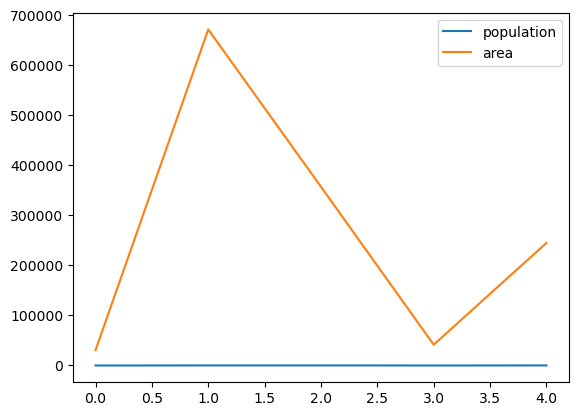

In [20]:
countries.plot()

However, for this dataset, it does not say that much:

<Axes: >

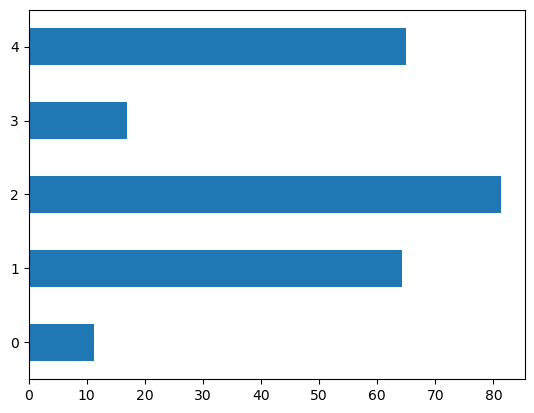

In [21]:
countries['population'].plot.barh()  # or .plot(kind='barh')

<div class="alert alert-success">

**EXERCISE**:

* You can play with the `kind` keyword or accessor of the `plot` method in the figure above: 'line', 'bar', 'hist', 'density', 'area', 'pie', 'scatter', 'hexbin', 'box'

Note: doing `df.plot(kind="bar", ...)` or `df.plot.bar(...)` is exactly equivalent. You will see both ways in the wild.
    
</div>

<div style="border: 5px solid #3776ab; border-radius: 2px; padding: 2em;">

## Python recap
    
Python objects have **attributes** and **methods**:
    
* Attribute: `obj.attribute` (no parentheses!) -> property of the object (pandas examples: `dtypes`, `columns`, `shape`, ..)
* Method: `obj.method()` (function call with parentheses) -> action (pandas examples: `mean()`, `sort_values()`, ...)

</div>

# Importing and exporting data

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* Parquet
* ...

In [22]:
# pd.read_

In [23]:
# countries.to_

<div class="alert alert-info">

**Note: I/O interface**

* All readers are `pd.read_...`
* All writers are `DataFrame.to_...`

</div>

# Application on a real dataset

Throughout the pandas notebooks, many of exercises will use the titanic dataset. This dataset has records of all the passengers of the Titanic, with characteristics of the passengers (age, class, etc. See below), and an indication whether they survived the disaster.


The available metadata of the titanic data set provides the following information:

VARIABLE   |  DESCRIPTION
------ | --------
Survived       | Survival (0 = No; 1 = Yes)
Pclass         | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Name           | Name
Sex            | Sex
Age            | Age
SibSp          | Number of Siblings/Spouses Aboard
Parch          | Number of Parents/Children Aboard
Ticket         | Ticket Number
Fare           | Passenger Fare
Cabin          | Cabin
Embarked       | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

<div class="alert alert-success">

**EXERCISE**:

* Read the CSV file (available at `data/titanic.csv`) into a pandas DataFrame. Call the result `df`.

<details><summary>Hints</summary>

- The read functions in pandas start with `pd.read_`. Combine this with TAB to see the options interactively.

</details>  

</div>

In [24]:
df = pd.read_csv("data/titanic.csv")

<div class="alert alert-success">

**EXERCISE**:

* Quick exploration: show the first 5 rows of the DataFrame.

</div>

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

**EXERCISE**:

* How many records (i.e. rows) has the titanic dataset?

<details><summary>Hints</summary>

* The length of a DataFrame gives the number of rows (`len(..)`). Alternatively, you can check the "shape" (number of rows, number of columns) of the DataFrame using the `shape` attribute. 

</details>
</div>

In [26]:
len(df)

891

<div class="alert alert-success">
    <b>EXERCISE</b>:

* Select the 'Age' column.

<details><summary>Hints</summary>

* Use the `[]` indexing notation and the column label (the name expressed as a string).

</details>

</div>

In [27]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>:

* Make a box plot of the Fare column.

</div>

<Axes: >

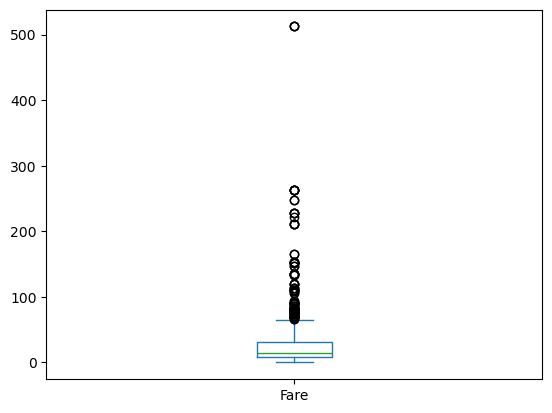

In [28]:
df['Fare'].plot.box()  # or .plot(kind='box')

<div class="alert alert-success">
    
**EXERCISE**:

* Sort the rows of the DataFrame by 'Age' column, with the oldest passenger at the top. Check the help of the `sort_values` function and find out how to sort from the largest values to the lowest values

</div>

In [29]:
df.sort_values(by='Age', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


---
# Acknowledgement


> This notebook is partly based on material of Jake Vanderplas (https://github.com/jakevdp/OsloWorkshop2014).